#Regular Solutions Part II - Enthalpy of Mixing

##Introduction
In the first tutorial, we looked at how to solve for the entropy of mixing for a regular solution, and then we looked at how a highly ordered system with and uneven distribution of two species tends toward a more uniform/mixed distributed system. 

Now we will add the effects of enthalpic interaction between the species.

In the pure state, interaction energy are between species 1 and itself and the interaction energy between species 2 and itself are, respectively, $w_{11}$ and $w_{22}$. Molecules of the same type attract one another via van der waals forces, so $w_{11}$ and $w_{22}$ are negative.

The enthalpy of the pure states are:

$H_1 = \frac{1}{2}m_1 z w_{11}$
 
$H_2 = \frac{1}{2}m_2 z w_{22}$

The 1/2 is because with z interactions (pairs of molecules - eg i with j and j with i) there are double the number of interactions as there are pairs.

We assume that the molecules only interact with nearest neighbors. 

What about cross-species interaction energies though? ie $w_{12}$

The enthalpy of the mixture is the sum of the number of species 1 interactions and species 2 interactions, each divided by two again due to the double counting of interactions when considering each particle.

Let's look at this with two approaches. In the first approach, we will render a lattice of species 1 and species 2 particles, and algorithmically count the interaction energies in the lattice. In the second, quicker approach, we will use the analytical expression for enthalpy which should give us a similar value as with the brute force counting method.


##Brute Force Lattice Counting
###1. A simple lattice-generating function:
Below is a simple function for creating a lattice of two species randomly mixed and with ratios of amounts of the two species defined by a chosen probability m_1_probability. The function also returns counts of the numbers of each particle m_1 and m_2 in addition to the lattice itself. 

In [110]:
%matplotlib inline
from __future__ import division
import numpy as np
import matplotlib.pyplot as plt
from random import random

def box(lattice_width, lattice_height,m_1_probability): # define a new function that builds a lattice w 2 species
    lattice_width = lattice_width
    lattice_height = lattice_height
    m_sites = lattice_width*lattice_height 
    lattice = np.zeros((lattice_height,lattice_width))
    m_2_probability = m_1_probability

    m_1 = 0.
    m_2 = 0.

    for i in range(0,lattice_height): 
        for j in range(0,lattice_width):
            random_number = random()
            if random_number > m_2_probability:
                lattice[i,j] = 1
                m_1 += 1.
            else:
                lattice[i,j] = 2
                m_2 += 1.
    print 'm_1, m_2, m_sites =', m_1, m_2, m_sites
    
    return m_1, m_2, m_sites, lattice # output the lattice matrix itself and the counts of species 1, 2, and total


###2. Enthalpy-quantifying Function
The function below accepts the three interaction energies and a lattice as inputs. The double for-loop goes through each site of the lattice and checks the species of the site's nearest neighbors. 

Technical note: the use of the modulo operator "%" is used to enforce a periodic boundary condition - ie the edge on the right side of the lattice neighbors the edge of the left side and likewise for the top and bottom. This allows every site to have 4 neighbors and avoids issues caused by boundary effects. The modulo operator in this case works by "resetting" the index to 0 when calling an index that exceeds the limits of the lattice size. Eg if the lattice has width 40 (with 0 being the first and 39 being the last sites), then 39 % 40 = 39 returning the original site coordinate if we're not exceeding the boundaries whereas 40 % 40 = 0, returning us to the beginning of the lattice. 

As the algorithm walks through the lattice, it checks only two nearest neighbor interactions, that of the site beneath and the site to the right of the site in question. Why? Because this will account for all interactions in the lattice after we go through the entire thing. If we did not do this, we would double-count interactions when examining a site and then in the next iteration examining its nearest neighbor.

The enthalpy of mixing is found by adding up all the interaction enthalpies.

For comparison, the analytical expression for the enthalpy of mixing is also included.

In [111]:
def enthalpy(w_11,w_12,w_22,lattice,m_1,m_2,m_sites):
    H_mix = 0.
    lattice = lattice
    w_12 = w_12
    w_22 = w_22
    w_11 = w_11
    lattice_height = len(lattice[:,0])
    lattice_width = len(lattice[0,:])
    for i in range(0,lattice_height):
        for j in range(0,lattice_width):                
            #find the nearest neighbors - use modulo to enforce periodic bound. cond.
            #examine edge to the right of current cell
            if lattice[((i+0)%lattice_height),((j+1)%lattice_width)] == lattice[i,j]: 
                if lattice[i,j] == 2:
                    H_mix += w_22
                else:
                    H_mix += w_11
            else: 
                H_mix += w_12
            #examine edge beneath the current cell
            if lattice[((i-1)%lattice_height),((j+0)%lattice_width)] == lattice[i,j]:
                if lattice[i,j] == 2:
                    H_mix += w_22
                else:
                    H_mix += w_11
            else: 
                H_mix += w_12
    x_1 = m_1/m_sites
    x_2 = m_2/m_sites
    z = 4.
    H_mix_analytical = .5*(m_1*z*(x_1*w_11 + x_2*w_12) + m_2*z*(x_1*w_12 + x_2*w_22))
    h_1_analytical = 0.5*m_1*z*w_11
    h_2_analytical = 0.5*m_2*z*w_22
    return H_mix_analytical, H_mix, h_1_analytical, h_2_analytical

###3. Running the functions to compute the mixture enthalpy
Below I've gone ahead and defined lattice dimensions, interaction enthalpies, and run the "box" function to generate the lattice shown in the plot. Then after running the enthalpy function, we can see values for the enthalpy of mixing both from the analytical expression and the algorithmic counting method. 

One way to think of the analytical expression is as an average interaction enthalpy multiplied by the number of interactions. The two methods give us somewhat different answers. In fact, the analytical version is an approximation that assumes perfect mixing and does not account for abnormality in the distribution. Take another look at the expression and you will see that the number of 1-1, 2-2, and 1-2 borders are not explicitly counted. Thus the error is bigger with smaller lattices where the distribution is less likely to reflect that of a perfectly uniform distribution. Information is lost in the expression, but since we are usually dealing with solutions with large numbers of molecules, thinking in terms of fractions of species is useful because in practice we do not know the exact positions and numbers of individual molecules.

m_1, m_2, m_sites = 1980.0 520.0 2500
-8568.96 -8547.0
-------
-7920.0 -3120.0


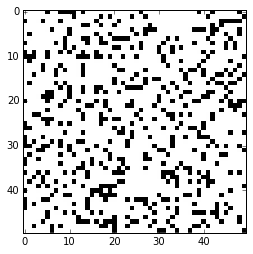

In [127]:
lattice_height_mixed = 50
lattice_width_mixed = 50
m_2_probability = 0.2
w_12 = -1.
w_22 = -3.
w_11 = -2.
m_1_mixed, m_2_mixed, m_sites_mixed, lattice_mixed = box(lattice_width_mixed,lattice_height_mixed,m_2_probability)
plt.imshow(lattice_mixed,cmap="Greys",interpolation='None')
h_mixed_analytical, h_mixed_numerical, h_1_analytical, h_2_analytical = enthalpy(w_11,w_12,w_22,lattice_mixed,m_1_mixed, m_2_mixed, m_sites_mixed)
print h_mixed_analytical, h_mixed_numerical
print '-------'
print h_1_analytical, h_2_analytical

###4. Subtracting pure species enthalpies to get the enthalpy of mixing
I've added calculations of the pure species enthalpies calculated both analytically and numerically from the numbers of species generated in the previous code. The enthalpy of mixing is then the difference between the mixture enthalpy and the pure species.

In [122]:
lattice_height_pure1 = 1
lattice_width_pure1 = int(m_1_mixed)
m_1_pure1, m_2_pure1, m_sites_pure1, lattice_pure1 = box(lattice_width_pure1,lattice_height_pure1,0)
h_pure1_analytical, h_pure1_numerical,h_1_analytical, h_2_analytical = enthalpy(w_11,w_12,w_22,lattice_pure1,m_1_pure1, m_2_pure1, m_sites_pure1)
print h_pure1_analytical, h_pure1_numerical

m_1, m_2, m_sites = 2012.0 0.0 2012
-8048.0 -8048.0


In [114]:
lattice_height_pure2 = 1
lattice_width_pure2 = int(m_2_mixed)
m_1_pure2, m_2_pure2, m_sites_pure2, lattice_pure2 = box(lattice_width_pure2,lattice_height_pure2,1)
h_pure2_analytical, h_pure2_numerical,h_1_analytical, h_2_analytical = enthalpy(w_11,w_12,w_22,lattice_pure2,m_1_pure2, m_2_pure2, m_sites_pure2)
print h_pure2_analytical, h_pure2_numerical

m_1, m_2, m_sites = 0.0 17.0 17
-102.0 -102.0


In [130]:
print h_mixed_analytical - h_pure1_analytical - h_pure2_analytical

-418.96


In [129]:
print h_mixed_numerical - h_pure1_numerical - h_pure2_numerical

-397.0
